## Practice: Linear regression from scratch

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generate data

In [70]:
np.random.seed(0) # fix the seed for reproducibility

mean = [0, 1] # mean of normal  distribution. Try others
cov = [[1, -0.75],
       [-0.75, 1]] # covariance of normal distribution

sample = np.random.multivariate_normal(mean, cov, size = 1000) # 1000 normally distributed samples

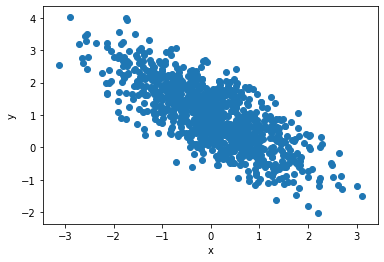

In [71]:
x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [72]:
# Add singular bias feature
X = np.array([np.array([1,val]) for val in x])
X[:5], y[:5]

(array([[ 1.        , -1.50864293],
        [ 1.        , -0.12325016],
        [ 1.        , -2.09246045],
        [ 1.        , -0.94223919],
        [ 1.        ,  0.24172089]]),
 array([2.79159681, 2.70780094, 2.40142063, 1.83521348, 1.0486161 ]))

In [73]:
X.shape, y.shape

((1000, 2), (1000,))

### Define model

Prediction function $y = \theta^Tx$:

In [74]:
def predict(X, theta):
    return np.dot(X,theta)

Cost function as normalized sum of errors on the dataset: $J(\theta) = \frac{1}{2n} \sum\limits_{i=1}^n(y-h_\theta(X))^2$

In [75]:
def computeCost(X, y, theta):
    return sum((y-predict(X, theta))**2) / (2*len(X))

Let's visualize cost function surface in 3d space. For this compute cost function value for a grid-shaped set of theta:

In [76]:
size = 100 # amount of tries for each parameter
limits = (-10,10) # range of values for each parameter
error = np.zeros((size,size)) # empty matrix of errors
for i,w in enumerate(np.linspace(*limits,size)): # for each theta[0] component
    for j,b in enumerate(np.linspace(*limits,size)): # for each theate[1] component
        error[i,j] = computeCost(X, y, np.array([w,b])) # compute cost for each theta

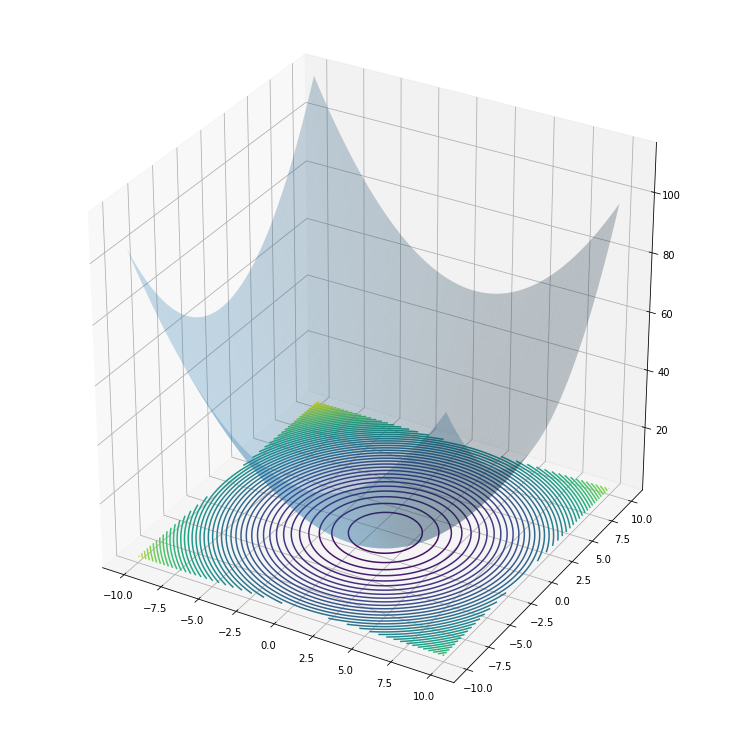

In [77]:
# initialize figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)

# create 2d array for each index 
L,K = np.meshgrid(np.linspace(*limits,size),np.linspace(*limits,size))

ax.plot_surface(K,L,Z = error, alpha = 0.25) # plot cost function surface in 3d
plt.contour(K,L,error,50, offset = 0) # plot cost function 2d-projection

## Learn model

Define learning algorithm

Simple gradient descent algorithm: 

$\theta = \theta + \alpha \nabla J(\theta)$

$\nabla J(\theta) = \sum_m(y - h_\theta(X))X$

In [78]:
def gradientDescent(X, y, init = 1, alpha = 0.001, iters = 100):
    #     theta = np.array([1,1]) * init # init theta with any scalar or vector
    theta = np.ones_like(X[0]) * init # init theta with any scalar or vector
    m = len(X)
    history = [] # list of theta values on each iteration 
    cost = [] # list of cost function values on each iteration
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        theta = theta + alpha * (np.sum((y - np.dot(X, theta.T)) * X.T, axis = 1))
        
    return theta, np.array(cost), np.array(history)

Initialize learning

In [79]:
alpha = 0.001
iters = 10

Learn model

In [80]:
w, cost, history = gradientDescent(X, y,
                                 alpha = alpha,
                                 iters = iters,
                                 init = [5, 10])# initialize with far point for better visualization

In [98]:
gd_alpha_nnd = alpha
gd_iters_nnd = iters
gd_cost_nnd = computeCost(X, y, w)
gd_weights_nnd = w
gd_batch_size_nnd = len(X)
print('Model`s cost:', computeCost(X, y, w))
print('Calculated weights: ', w)

Model`s cost: 0.20871857438834734
Calculated weights:  [ 1.01124706 -0.74117836]


Check (0,0) solution:

In [82]:
ww = [0,0]
print("Model's cost: ", computeCost(X, y, ww))

Model's cost:  0.9476565386534365


Visualize model

[-3.12975815  3.11266229]


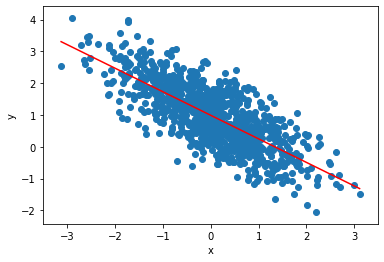

In [83]:
extremes = np.array([np.min(x), np.max(x)])
line = w[0] + extremes * w[1]
print(extremes)
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Visualize learning process

Cost function:

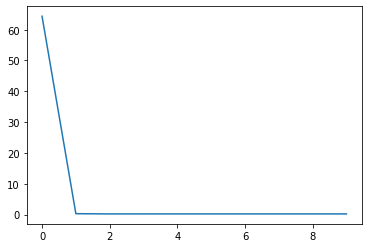

In [84]:
plt.plot(cost)

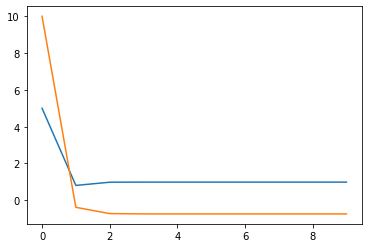

In [85]:
plt.plot(history)

Model's trajectory in parameter's space

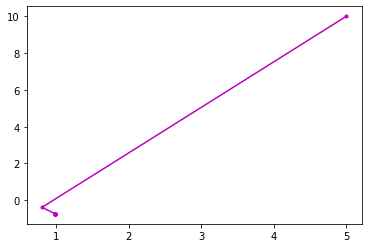

In [86]:
# plt.coutour(K, L, error, 50)
plt.plot(history[:,0], history[:,1], 'm.-')

Model's trajectory on cost function surface:

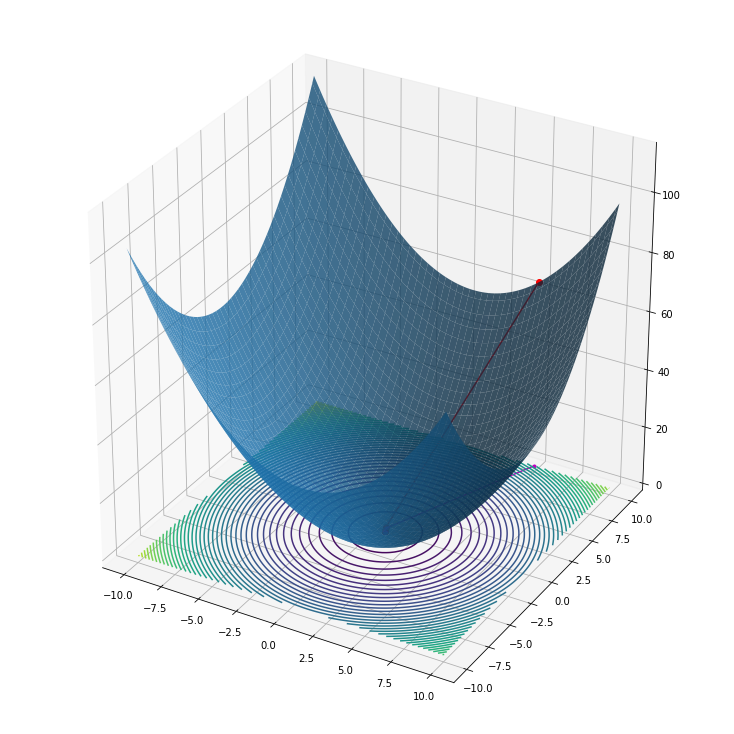

In [87]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
ax.plot_surface(K,L,Z = error, alpha = 0.8)
ax.plot3D(history[:,0], history[:,1], cost, 'ro-')
plt.contour(K,L,error,50, offset = 0)
plt.plot(history[:,0], history[:,1],'m.-')

Add stochastic mode for gradient descent:

In [88]:
def StochasticGD(X, y, alpha, iters, batch_size, init = 1):
    theta = np.ones_like(X[0]) * init
    # vars for visualization purpuses
    cost = []
    history = []
    data = [] # for batches 
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        idx = np.random.choice(len(X), replace=False, size=batch_size) # choose random batch from dataset
        data.append((X[idx][:,1], y[idx]))
        theta, _, _ = gradientDescent(X[idx], y[idx],
                                     alpha = alpha,
                                     iters = 1,
                                     init = theta)
    return theta, np.array(cost), np.array(history), np.array(data)

In [89]:
sgd_iters_nnd = iters*80
sgd_alpha_nnd = 0.001
sgd_batch_size_nnd = 10
w, cost, history, data = StochasticGD(X, y,
                                     alpha = sgd_alpha_nnd,
                                     iters = sgd_iters_nnd,
                                     batch_size = sgd_batch_size_nnd,
                                     init = [5,10])

In [90]:
sgd_cost_nnd = computeCost(X, y, w)
sgd_weights_nnd = w
print("Model's cost: ", computeCost(X, y, w))
print("Calculated weights: ", w)

Model's cost:  0.20871857438834734
Calculated weights:  [ 1.01124706 -0.74117836]


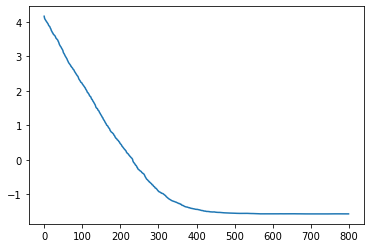

In [91]:
plt.plot(np.log(cost)) # often looks beter in log scale

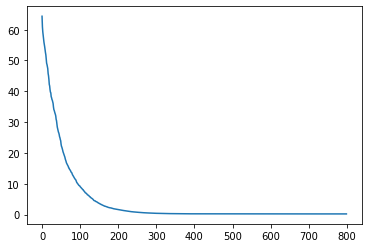

In [92]:
plt.plot(cost)

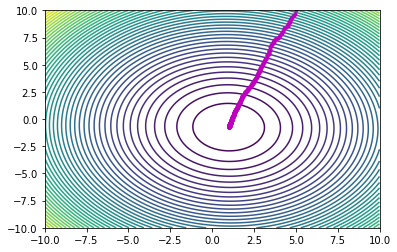

In [93]:
plt.contour(K,L,error,50)
plt.plot(history[:,0], history[:,1],'m.-')

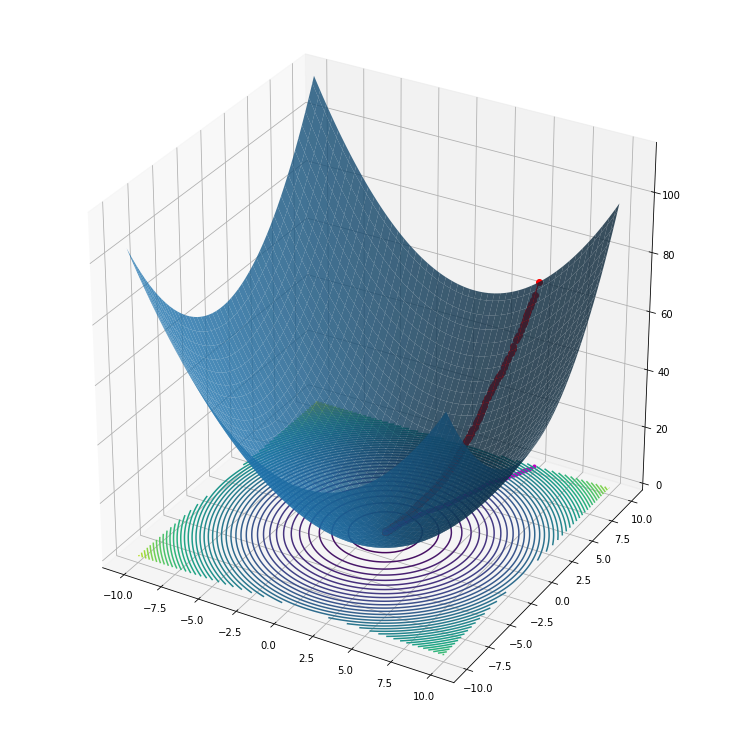

In [94]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
ax.plot_surface(K,L,Z = error, alpha = 0.8)
ax.plot3D(history[:,0], history[:,1], cost, 'ro-')
plt.contour(K,L,error,50, offset = 0)
plt.plot(history[:,0], history[:,1],'m.-')

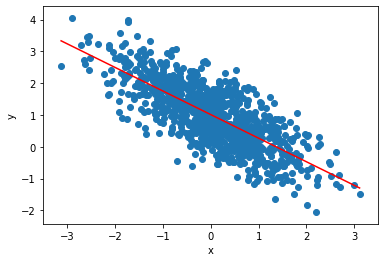

In [95]:
extremes = np.array([np.min(x), np.max(x)])
line =  w[0] + extremes * w[1]
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Let`s compare GD and SGD for our data

In [96]:
import pandas as pd

models = {'Cost_func_val': [gd_cost_nnd, sgd_cost_nnd],
        'Iters_count': [gd_iters_nnd, sgd_iters_nnd],
        'Alpha': [gd_alpha_nnd, sgd_alpha_nnd],
        'Batch_size': [gd_batch_size_nnd, sgd_batch_size_nnd],
         'Weights': [gd_weights_nnd, sgd_weights_nnd]}

df = pd.DataFrame(models, columns = ['Cost_func_val','Iters_count', 'Alpha','Batch_size', 'Weights'], index=['GD','SGD'])
print(df)

     Cost_func_val  Iters_count  Alpha  Batch_size  \
GD        0.208462           10  0.001        1000   
SGD       0.208719          800  0.001          10   

                                       Weights  
GD    [0.988618505730046, -0.7398405932683202]  
SGD  [1.0112470649159544, -0.7411783567778351]  


# Conclusions
If we have not a bid dataset GD - good method to use. But if we have big dataset better to use SGD because it learns though batches not thought all dataset. As the result we use less capacity and time on learning. 

By using SGD we need to choose not only count of iter and alpha, we need to find balance between batch sizes for lowwer value of cost function.

For normalized normal distribution both GD and SGD are good methods if we choose optimal parametrs.

GD we can use once on big dataset for have base optimal cost func value to estimate quickier methods like SGD and other.

Concepts 'bid dataset', 'not bid dataset'' depend of our memory, GPU, CPU, ect. limitations

# Store data for future comparison

In [102]:
%store gd_cost_nnd
%store sgd_cost_nnd
%store gd_iters_nnd
%store sgd_iters_nnd
%store gd_alpha_nnd
%store sgd_alpha_nnd
%store gd_batch_size_nnd
%store sgd_batch_size_nnd
%store gd_weights_nnd
%store sgd_weights_nnd

Stored 'gd_cost_nnd' (float64)
Stored 'sgd_cost_nnd' (float64)
Stored 'gd_iters_nnd' (int)
Stored 'sgd_iters_nnd' (int)
Stored 'gd_alpha_nnd' (float)
Stored 'sgd_alpha_nnd' (float)
Stored 'gd_batch_size_nnd' (int)
Stored 'sgd_batch_size_nnd' (int)
Stored 'gd_weights_nnd' (ndarray)
Stored 'sgd_weights_nnd' (ndarray)
